In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [13]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,
                      random_state=2)

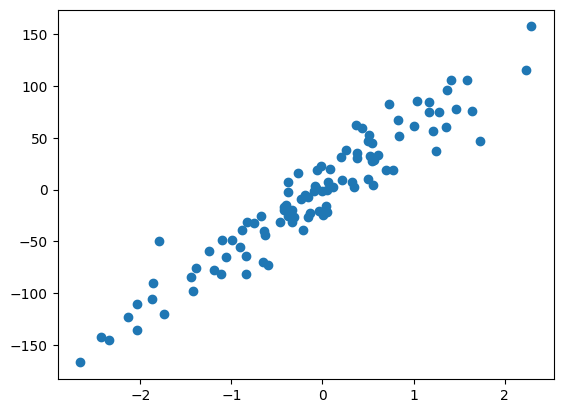

In [15]:
plt.scatter(x,y)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
print('m = ',lr.coef_,'b = ',lr.intercept_)

m =  [58.85092863] b =  1.4587736173147139


In [27]:
y_pred = lr.predict(x_test)
y_pred

array([ 32.3141054 ,  23.84990238,  16.55818298, -20.64972079,
         1.45934809,  76.69257846, -63.20303373,  31.05381201,
        23.93195611, -50.21869134,  87.83298747,  -9.69166856,
         4.2818875 , 132.77678125,  74.91726312,  49.99331133,
       -36.98561127, -48.22398681, -42.55412624,  -2.92389993])

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8723215560499293

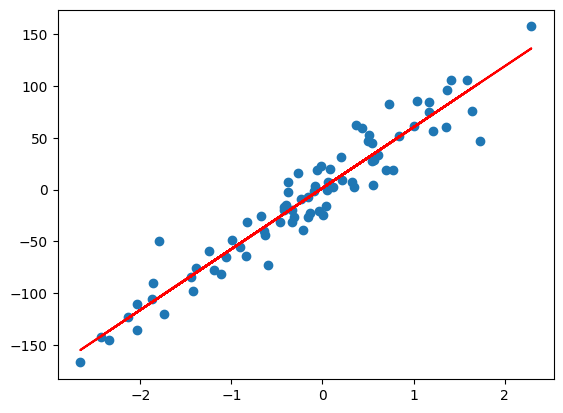

In [78]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color='red')

# **`Code From Scratch`**

In [193]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m=100 # assumption
        self.b=-120 # assumption
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,x,y):
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y-self.m*x.ravel()-self.b)
            loss_slope_m = -2 * np.sum((y - self.m*x.ravel() - self.b)*x.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,x):
        return self.m * x + self.b
        

In [195]:
gd = GDRegressor(0.001,50)


In [197]:
gd.fit(x_train,y_train)

58.82994668946077 1.4247089558186807


In [199]:
y_pred=gd.predict(x_test)
y_pred

array([[ 32.26903998],
       [ 23.80785468],
       [ 16.51873497],
       [-20.67590318],
       [  1.42528322],
       [ 76.63169092],
       [-63.21404472],
       [ 31.00919592],
       [ 23.88987915],
       [-50.23433159],
       [ 87.76812808],
       [ -9.72175779],
       [  4.24681632],
       [132.69589819],
       [ 74.85700853],
       [ 49.9419428 ],
       [-37.00596947],
       [-48.24033824],
       [-42.57249912],
       [ -2.95640206]])

In [201]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8724901969687482

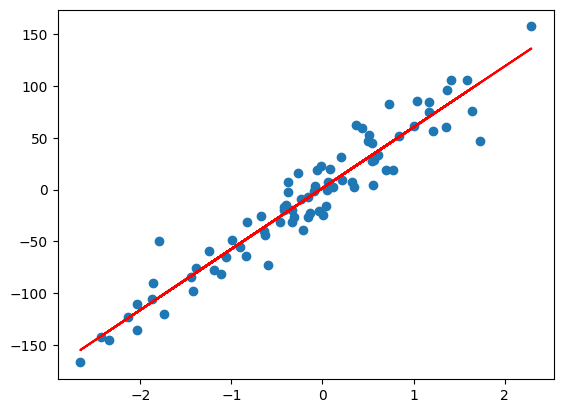

In [203]:
plt.scatter(x_train,y_train)
plt.plot(x_train,gd.predict(x_train),color='red')

# **`See hmne sklearn k sath sath GD se bhi krke dekha and result bilkul sahi h
So the concusion is ki OLS,GD, AND Sklearn same result hi dete h but ols ka use hm ni kr skte bcz complexity jada hogi ols me `**